# Self Organizing Maps

In this notebook, I'll try to identify credit card applications using Self Organizing Maps.

## Import libraries and dataset

I'll import the necessary libraries. Then, I'll import the dataset and split it into features and label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Scaling the data

I'll use `MinMaxScaler` to scale the the data.

In [4]:
minMaxScaler = MinMaxScaler(feature_range = (0, 1))
X = minMaxScaler.fit_transform(X)

## Train using Minisom

In [5]:
miniSom = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [6]:
miniSom.random_weights_init(X)
miniSom.train_random(data = X, num_iteration = 100)

## Plotting

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
%pylab inline

Populating the interactive namespace from numpy and matplotlib


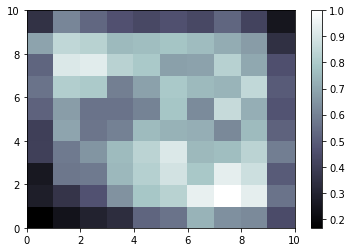

In [8]:
bone()
distance_map = miniSom.distance_map().T
pcolor(distance_map)
colorbar()

Outliers are represented using whites as they are as far away from others. This shall include the list of frauds.

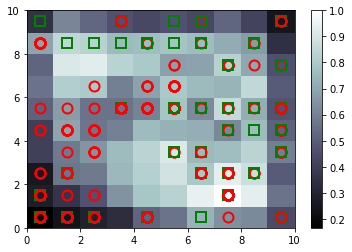

In [9]:
bone()
pcolor(distance_map)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = miniSom.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2)

There point I'm interetsed in is (7, 1) as it is the most white (max deviation from others).

## Finding frauds

In [10]:
mappings = miniSom.win_map(X)
frauds = mappings[7, 1]
frauds = minMaxScaler.inverse_transform(frauds)

The `frauds` include the potential list of people who are most likely to commit frauds.

In [11]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15699839.0,0.0,28.17,0.585,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,260.0,1005.0
1,15648069.0,0.0,24.50,1.750,1.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,132.0,1.0
2,15705918.0,0.0,37.33,2.500,2.0,3.0,8.0,0.210,0.0,0.0,0.0,0.0,2.0,260.0,247.0
3,15706762.0,0.0,40.83,3.500,2.0,3.0,5.0,0.500,0.0,0.0,0.0,0.0,1.0,1160.0,1.0
4,15719940.0,0.0,35.17,3.750,2.0,1.0,1.0,0.000,0.0,1.0,6.0,0.0,2.0,0.0,201.0
5,15672894.0,0.0,18.58,10.000,2.0,2.0,4.0,0.415,0.0,0.0,0.0,0.0,2.0,80.0,43.0
6,15651868.0,0.0,38.75,1.500,2.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,76.0,1.0
7,15694666.0,0.0,26.50,2.710,1.0,8.0,4.0,0.085,0.0,0.0,0.0,0.0,1.0,80.0,1.0
8,15728523.0,0.0,38.33,4.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,160.0,1.0
9,15716082.0,0.0,22.25,1.250,1.0,1.0,1.0,3.250,0.0,0.0,0.0,0.0,2.0,280.0,1.0
